In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.cross_validation import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
df = pd.read_csv('./train.csv', index_col=0)
a1, a2 = train_test_split(df, test_size=0.25)
df_train, df_control = pd.DataFrame(a1, columns=df.columns), pd.DataFrame(a2, columns=df.columns)
df_test = pd.read_csv('./test.csv', index_col=0)
print df_train.target.value_counts()

Class_2    12144
Class_6    10613
Class_8     6354
Class_3     5984
Class_9     3687
Class_7     2128
Class_5     2058
Class_4     1990
Class_1     1450
dtype: int64


In [71]:
#corr = df.corr()
for col in corr.columns:
    l = len(corr[(np.abs(corr[col]) > 0.7) & (np.abs(corr[col]) < 1.0)])
    if l > 0:
        print col, l

feat_3 1
feat_9 1
feat_15 1
feat_30 1
feat_39 1
feat_45 1
feat_46 1
feat_64 1
feat_72 1
feat_84 1


In [70]:
print corr[corr.feat_3 >0.7]

           feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
feat_3  -0.027807  0.082573  1.000000  0.583523  0.010880  0.004288  0.001294   
feat_46 -0.040647  0.042491  0.777517  0.436274 -0.003583  0.001892 -0.012643   

           feat_8    feat_9   feat_10    ...      feat_84   feat_85   feat_86  \
feat_3  -0.053462 -0.063551  0.036944    ...     0.011159 -0.048626 -0.096093   
feat_46 -0.050246 -0.053175  0.013546    ...    -0.001093 -0.049848 -0.092302   

          feat_87   feat_88   feat_89   feat_90   feat_91   feat_92   feat_93  
feat_3  -0.009838 -0.082336  0.174781 -0.015068 -0.012417  0.066921  0.006814  
feat_46 -0.019250 -0.077723  0.114977 -0.026419 -0.022626  0.049284 -0.004403  

[2 rows x 93 columns]


In [40]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence, partial_dependence

for label in ['Class_'+str(i) for i in range(1,8)]:
    features = range(1, 5)
    fig, axs = plot_partial_dependence(grid_search.best_estimator_, aux, features, n_cols=6,
                        feature_names=aux.columns, label=label, grid_resolution=10)
    fig.suptitle('Label: ' + str(label))
    fig.set_size_inches(15,7)

    fig.subplots_adjust(top=0.9)

ValueError: gbrt has to be an instance of BaseGradientBoosting

In [22]:
gr = df.groupby(df.target)

In [38]:
print gr.aggregate(len)['feat_1']
print gr.aggregate([np.mean, np.std, np.max])[['feat_'+str(i) for i in range(1,4)]]

target
Class_1     1929
Class_2    16122
Class_3     8004
Class_4     2691
Class_5     2739
Class_6    14135
Class_7     2839
Class_8     8464
Class_9     4955
Name: feat_1, dtype: int64
           feat_1                    feat_2                    feat_3  \
             mean       std  amax      mean       std  amax      mean   
target                                                                  
Class_1  0.441680  1.233120    25  0.129082  0.486785    10  0.165371   
Class_2  0.331348  1.216319    22  0.015011  0.162246     5  0.085783   
Class_3  0.241629  1.051747    22  0.031234  0.254950     7  0.098076   
Class_4  0.610554  2.340516    30  0.013006  0.125761     2  0.089929   
Class_5  0.024461  0.170250     3  0.031763  0.243421     2  0.053669   
Class_6  0.263601  0.905458    11  0.310647  0.935932    26  3.290131   
Class_7  0.349771  1.011156    13  0.306446  1.782124    39  0.222614   
Class_8  0.558129  2.688205    61  1.153001  2.767463    51  0.541352   
Class_9  0

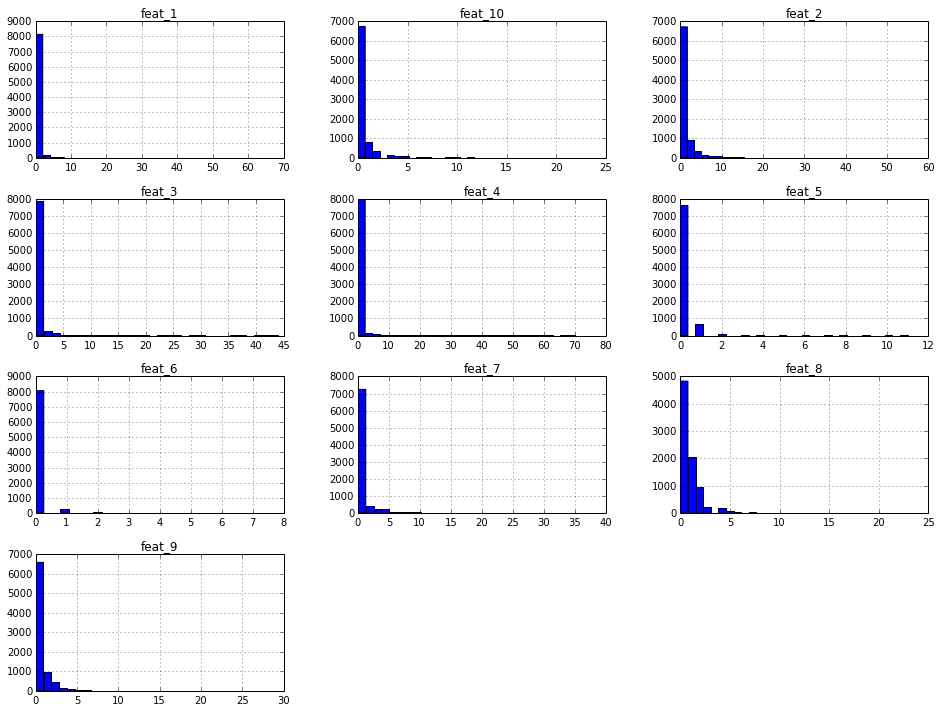

In [14]:
df[df.columns[:10]].hist(figsize=(16,12), bins=30)
plt.show()

In [128]:
print df_train.shape
print df_aux.shape

(46408, 94)
(61878, 94)


In [4]:
def prep_data(df, tfidf = None):
    if not tfidf:
        tfidf = TfidfTransformer()
    return tfidf.fit_transform(df).toarray(), tfidf


# Prediction

In [15]:
#Best so far Score: 0.806843647647 {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 100, 
#'min_samples_split': 3, 'criterion': 'gini', 'max_features': 10}

#GBC - Score: 0.79858754323 {'n_estimators': 1000, 'learning_rate': 0.05, 'verbose': 0.5}
'''
clf = RandomForestClassifier()
param_grid = {'n_estimators': [100], 'max_features': [10,'auto',20], 'min_samples_split': [2,3,5,9],
             'min_samples_leaf': [1,3,5], 'bootstrap':[True, False], 'criterion':['entropy', 'gini']}
param_grid = {'n_estimators': [100], 'max_features': [10], 'min_samples_split': [3],
             'min_samples_leaf': [1], 'bootstrap':[False], 'criterion':['gini']}
'''
clf = GradientBoostingClassifier()
param_grid = {'learning_rate':[0.001, 0.01, 0.05], 'n_estimators':[200, 500, 1000], 'max_depth':[1,2,4,8],
             'min_samples_split':[1,2,4,8],'max_features':[10, None], 'verbose':[0.5]}
param_grid = {'learning_rate':[0.1], 'n_estimators':[3000], 'verbose':[1]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)

aux_data, tfidf = prep_data( df[df.columns[:-1]] )
grid_search.fit( aux_data, df.target)
print 'Score:', grid_search.best_score_, grid_search.best_params_

      Iter       Train Loss   Remaining Time 
         1       75017.4182          325.91m
         2       67357.0086          307.85m
         3       61715.4259          296.98m
         4       57274.8675          285.13m
         5       53766.6252          277.99m
         6       50763.5187          278.29m
         7       48185.9540          279.64m
         8       46041.4627          281.52m
         9       44145.3338          279.17m
        10       42521.8467          276.64m
        20       33222.9078          266.52m
        30       29201.0978          260.91m
        40       26981.8073          257.12m
        50       25452.7438          254.81m
        60       24309.0244          258.72m
        70       23423.3580          257.98m
        80       22669.8911          255.51m
        90       21987.9895          253.54m
       100       21458.3210          251.43m
       200       17910.3855          235.81m
       300       15755.5694          224.45m
       40

In [16]:
#control = grid_search.best_estimator_.predict(df_control[df.columns[:-1]])
results = grid_search.predict_proba( prep_data( df_test[df.columns[:-1]], tfidf )[0] ) 

In [81]:
print sum(control == df_control.target) / float(len(control))

0.809502262443


# Output

In [17]:
import csv
with open('./output.csv', 'w') as fh:
    writer = csv.writer(fh)
    writer.writerow(['id','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
    for i, r in enumerate(results):
        row = [i+1] + map(lambda x: round(x, 3), list(r))
        writer.writerow(row)

In [3]:
import itertools
[x for x in itertools.product([1,2,3], [4,5,6], [2,1])]

[(1, 4, 2),
 (1, 4, 1),
 (1, 5, 2),
 (1, 5, 1),
 (1, 6, 2),
 (1, 6, 1),
 (2, 4, 2),
 (2, 4, 1),
 (2, 5, 2),
 (2, 5, 1),
 (2, 6, 2),
 (2, 6, 1),
 (3, 4, 2),
 (3, 4, 1),
 (3, 5, 2),
 (3, 5, 1),
 (3, 6, 2),
 (3, 6, 1)]